c:\Users\Acer\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"

Bad key text.latex.unicode in file c:\Users\Acer\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file c:\Users\Acer\anaconda3\

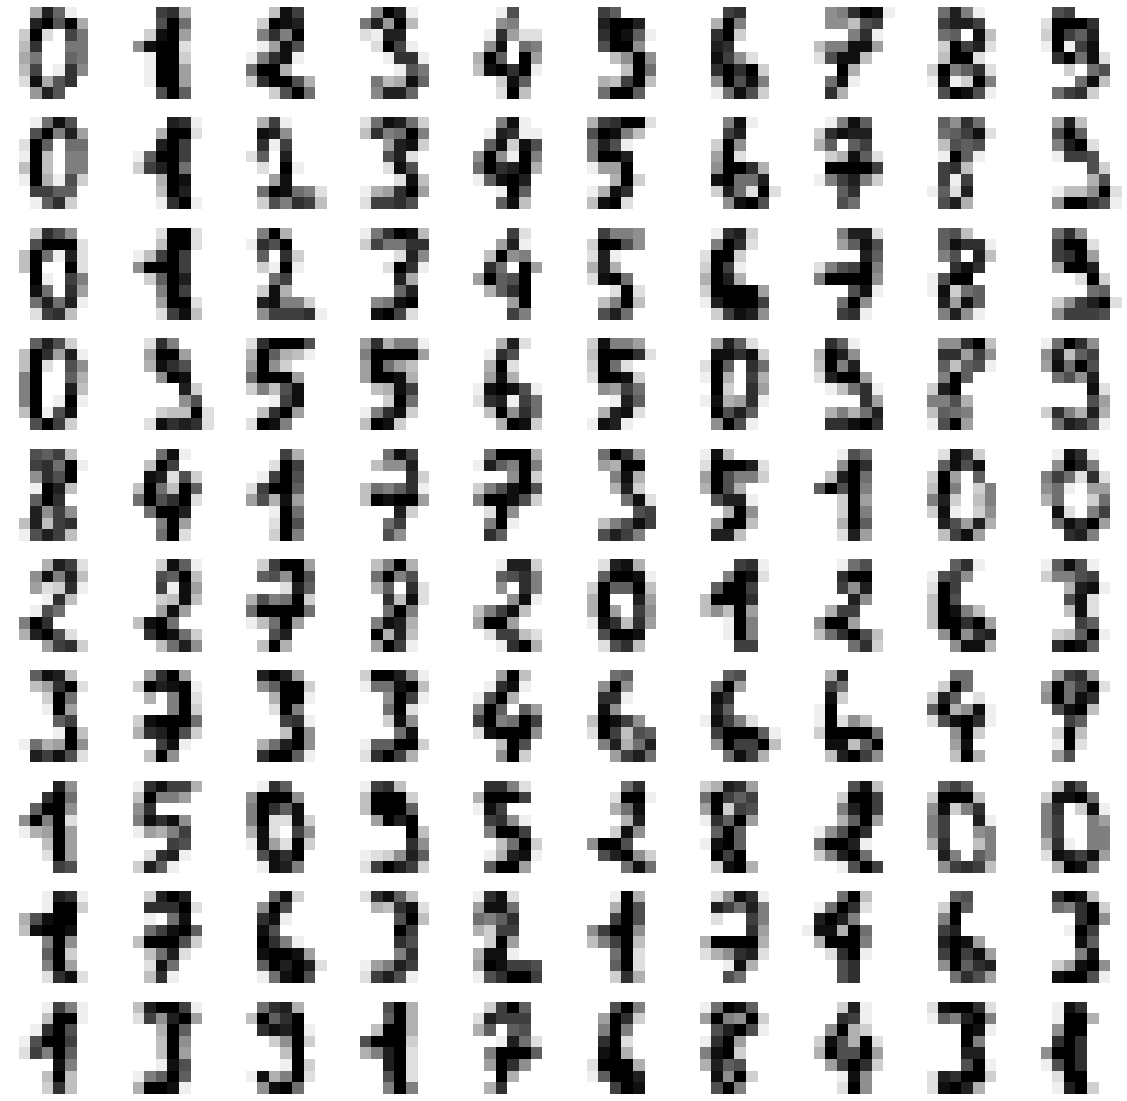

In [2]:
# import numpy
import numpy as np
# load sklearn digits dataset
from sklearn.datasets import load_digits
digits = load_digits()

# prepare traing and test data
X_train = digits.data[:1000]
y_train = digits.target[:1000]
X_test = digits.data[1000:]
y_test = digits.target[1000:]

# plot digit samples
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(X_train[i].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
plt.show()



# Multi-layer Perceptron classifier

In [3]:
# create a neural network using sklearn for digit classification
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=400, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-6, random_state=101011,
                    learning_rate_init=.01)

# Fit model
# get time to train model
from time import time
t0 = time()
mlp.fit(X_train, y_train)
ts = (time() - t0)
print("Training time: %0.3fs" % (ts))

Iteration 1, loss = 4.10358813
Iteration 2, loss = 0.95964101
Iteration 3, loss = 0.39229094
Iteration 4, loss = 0.23688126
Iteration 5, loss = 0.12830681
Iteration 6, loss = 0.09135046
Iteration 7, loss = 0.07135139
Iteration 8, loss = 0.04669508
Iteration 9, loss = 0.03722071
Iteration 10, loss = 0.02649927
Iteration 11, loss = 0.01937252
Iteration 12, loss = 0.01403758
Iteration 13, loss = 0.01222474
Iteration 14, loss = 0.01018530
Iteration 15, loss = 0.00900599
Iteration 16, loss = 0.00761935
Iteration 17, loss = 0.00587314
Iteration 18, loss = 0.00549010
Iteration 19, loss = 0.00474491
Iteration 20, loss = 0.00429395
Iteration 21, loss = 0.00378650
Iteration 22, loss = 0.00356254
Iteration 23, loss = 0.00308511
Iteration 24, loss = 0.00290514
Iteration 25, loss = 0.00263983
Iteration 26, loss = 0.00243872
Iteration 27, loss = 0.00224235
Iteration 28, loss = 0.00210400
Iteration 29, loss = 0.00193601
Iteration 30, loss = 0.00180427
Iteration 31, loss = 0.00175192
Iteration 32, los

In [4]:
# predict on test data
y_pred = mlp.predict(X_test)
y_pred.shape

(797,)

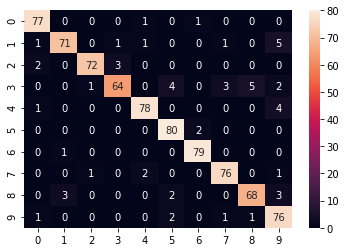

accuracy_score 0.9297365119196989
Training time: 1.383s


In [5]:
# confusion matrix heatmap with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# print acuracy score
from sklearn.metrics import accuracy_score
print("accuracy_score",accuracy_score(y_test, y_pred))
# print time to train
print("Training time: %0.3fs" % (ts))

# Artificial Neural Network

In [9]:
# create an artificial neural network using tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# initialize ann model
ann = Sequential()
ann.add(Dense(100, activation='relu', input_shape=(64,)))
ann.add(Dense(10, activation='softmax'))
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit data
# time the training process
import time
t0 = time.time()

ann.fit(X_train, to_categorical(y_train), epochs=30,batch_size=32)

ts = time.time() - t0

Epoch 1/30
32/32 [==============================] - 0s 2ms/step - loss: 3.8449 - accuracy: 0.2930
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.7868 - accuracy: 0.7510
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8800
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9370
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9510
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9670
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9790
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9880
Epoch 9/30
32/32 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9900
Epoch 10/30
32/32 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9950
Epoch 11/30
32/32 [

In [10]:
# pridict the test set
predictions = ann.predict(X_test)
predictions.shape

25/25 [==============================] - 0s 1ms/step


(797, 10)

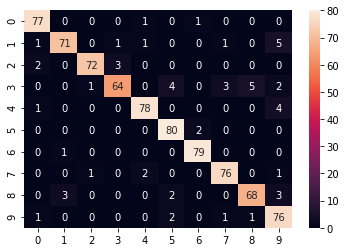

accuracy_score 0.9284818067754078
time taken to train 7.526205778121948


In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()
# print accuracy score
print("accuracy_score",accuracy_score(y_test, np.argmax(predictions, axis=1)))

# print time taken to train
print("time taken to train", time.time() - t0)


# Convolutional neural network

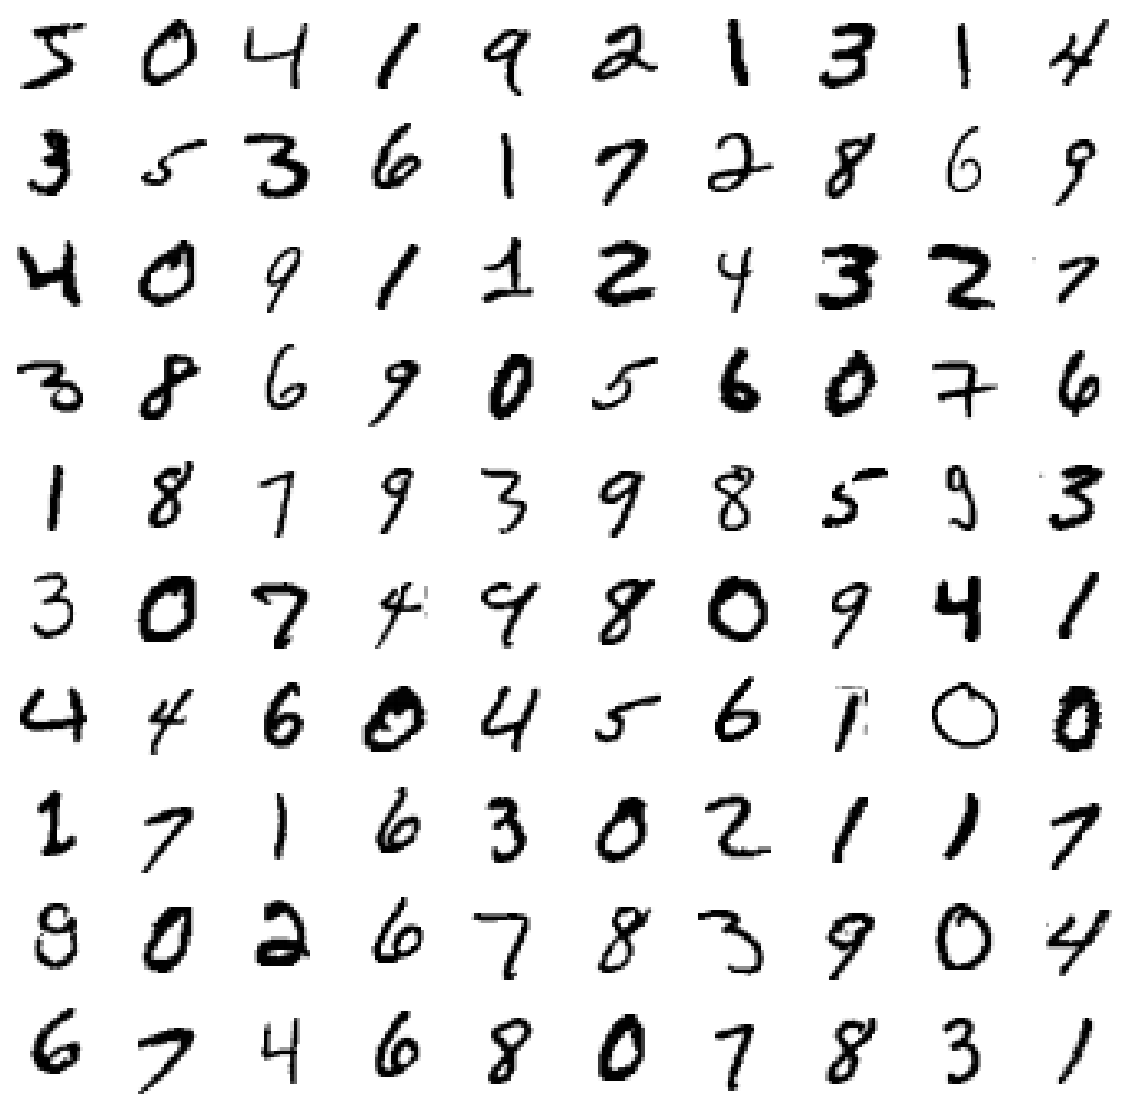

In [12]:
# load keras digit data set
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot digit samples
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
plt.show()


In [13]:
# initialize convolutional neural network model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model summary
cnn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [14]:
# time training
t0 = time.time() 
# fit cnn model
cnn.fit(X_train.reshape(X_train.shape[0], 28, 28, 1), to_categorical(y_train), epochs=30, batch_size=32)
# time taken to train
ts = time.time() - t0


Epoch 1/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4169 - accuracy: 0.9405
Epoch 2/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0717 - accuracy: 0.9782
Epoch 3/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0561 - accuracy: 0.9831
Epoch 4/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0510 - accuracy: 0.9844
Epoch 5/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0427 - accuracy: 0.9872
Epoch 6/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0364 - accuracy: 0.9888
Epoch 7/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0343 - accuracy: 0.9898
Epoch 8/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0302 - accuracy: 0.9910
Epoch 9/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0300 - accuracy: 0.9910
Epoch 10/30
1875/1875 [==============================] - 23s 12m

In [17]:
# predict on test data
predictions = cnn.predict(X_test.reshape(X_test.shape[0], 28, 28, 1))

predictions.shape

313/313 [==============================] - 1s 4ms/step


(10000, 10)

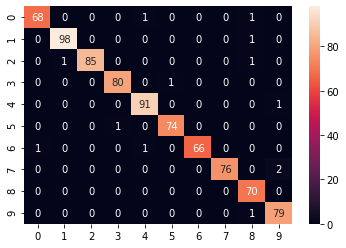

accuracy_score 0.9858
time taken to train 716.7939465045929


In [18]:
# plot seborn heatmap confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test[:800], np.argmax(predictions, axis=1)[:800])
sns.heatmap(cm, annot=True)
plt.show()

# print accuracy score
from sklearn.metrics import accuracy_score
print("accuracy_score",accuracy_score(y_test, np.argmax(predictions, axis=1)))
# print time taken to train
print("time taken to train", time.time() - t0)

# Conclusions
- Although the CNN has the best results the model took 5-20 times longer than the ANN and MLP
- I used the tensorflow digits on the CNN because the sklearn data had trouble reshaping
  